# Dataset used https://www.kaggle.com/datasets/gauravduttakiit/medical-insurance-cost?select=Train_Data.csv

Importing necessary modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline

Reading the dataset into the dataframe df

In [2]:
df=pd.read_csv('/kaggle/input/medical-insurance-cost/Train_Data.csv')
df.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


Performing multivariate analysis on the dataset depicting relationship between age, smoking and charges

In [3]:
df.dtypes

age         float64
sex          object
bmi         float64
smoker       object
region       object
children      int64
charges     float64
dtype: object

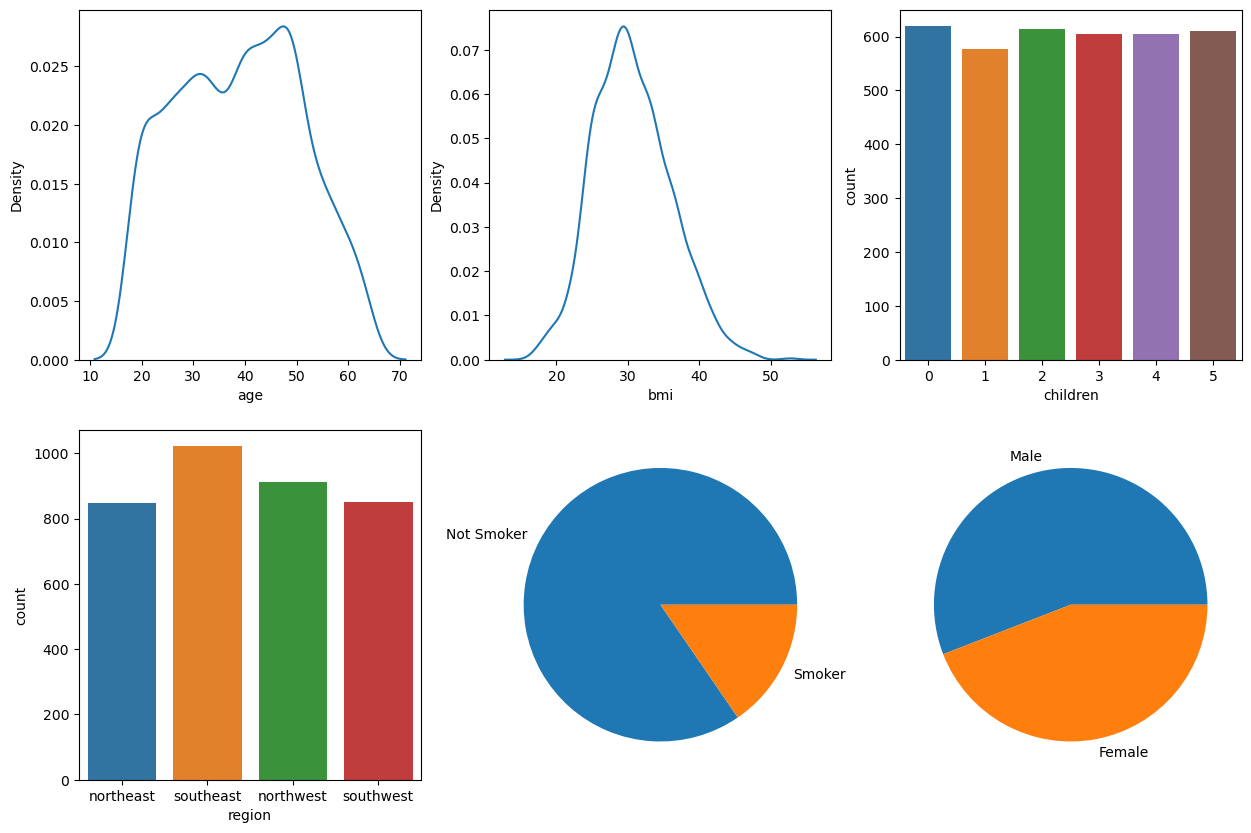

In [4]:
fig,ax=plt.subplots(2,3, figsize=(15,10))
sns.kdeplot(data=df,x='age', ax=ax[0,0])
sns.kdeplot(data=df,x='bmi', ax=ax[0,1])
sns.countplot(data=df,x='children', ax=ax[0,2])
sns.countplot(data=df,x='region',ax=ax[1,0],)
plt.subplot(2,3,5)
plt.pie(df['smoker'].value_counts().values,labels=['Not Smoker','Smoker'])
plt.subplot(2,3,6)
plt.pie(df['sex'].value_counts().values,labels=['Male','Female'])
plt.show()

In [5]:
df.smoker.value_counts(1)

no     0.84573
yes    0.15427
Name: smoker, dtype: float64

# The dataset is evenly distributed based on gender, age, bmi and region. Although 80% of the sample is non-smoker and 20% smoker

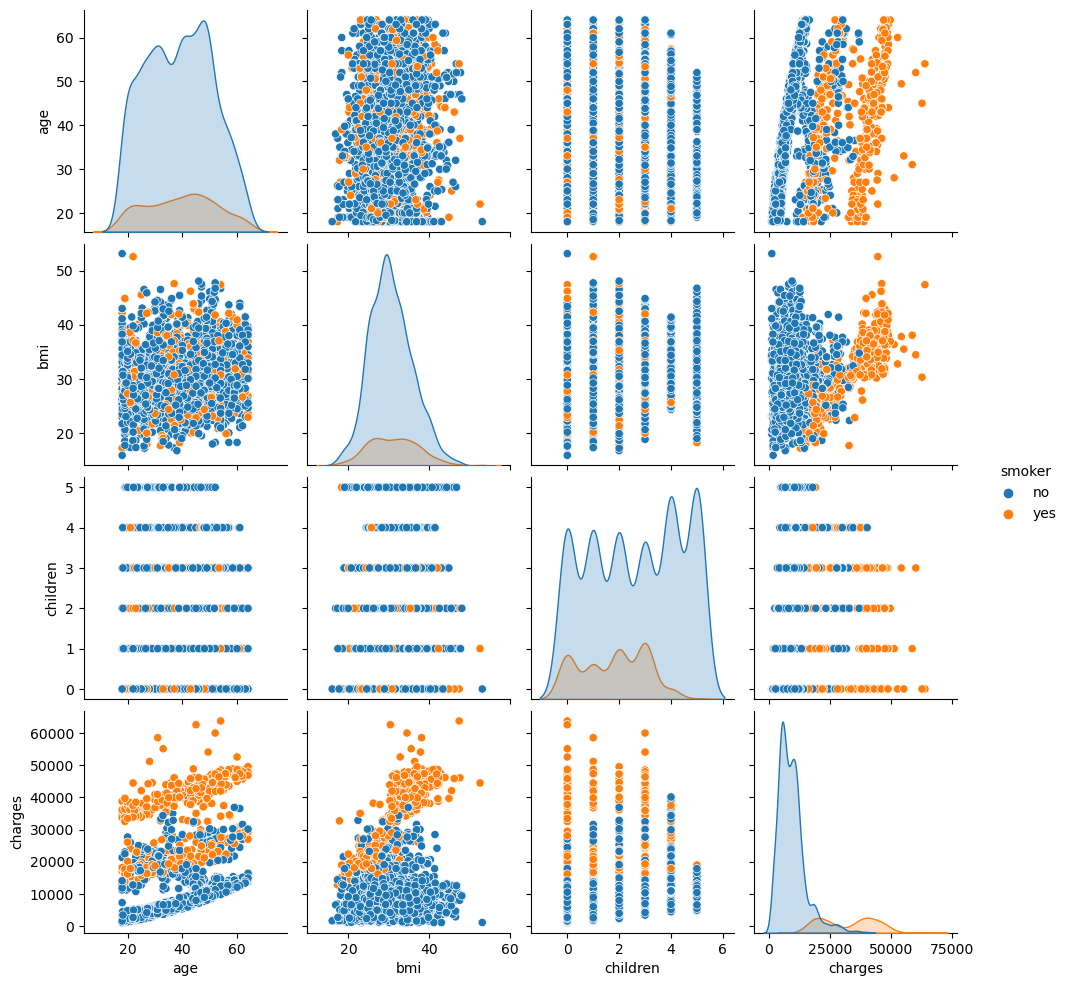

In [6]:
sns.pairplot(data=df, hue='smoker')

# Smokers with high BMI are the ones to pay highest charges among the sample. 

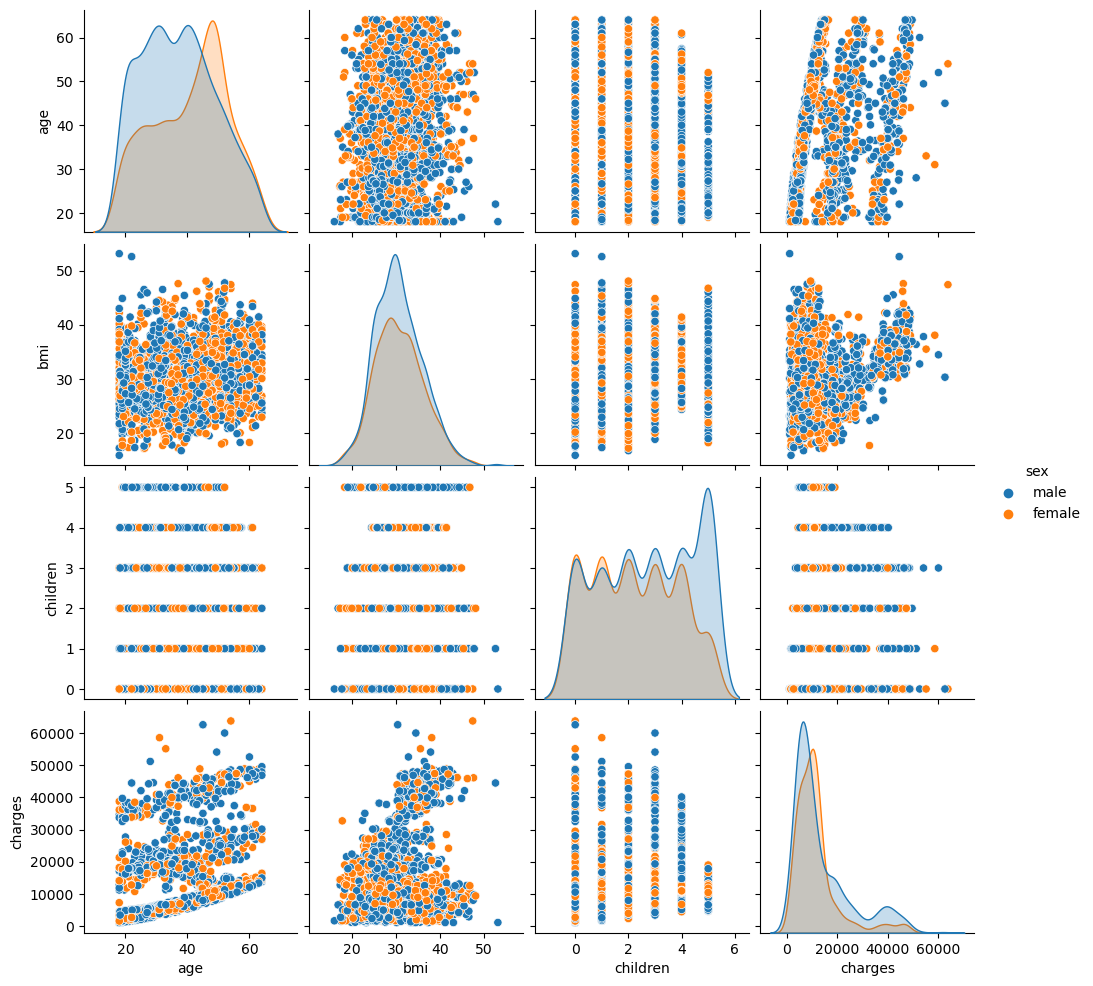

In [7]:
sns.pairplot(data=df, hue='sex')

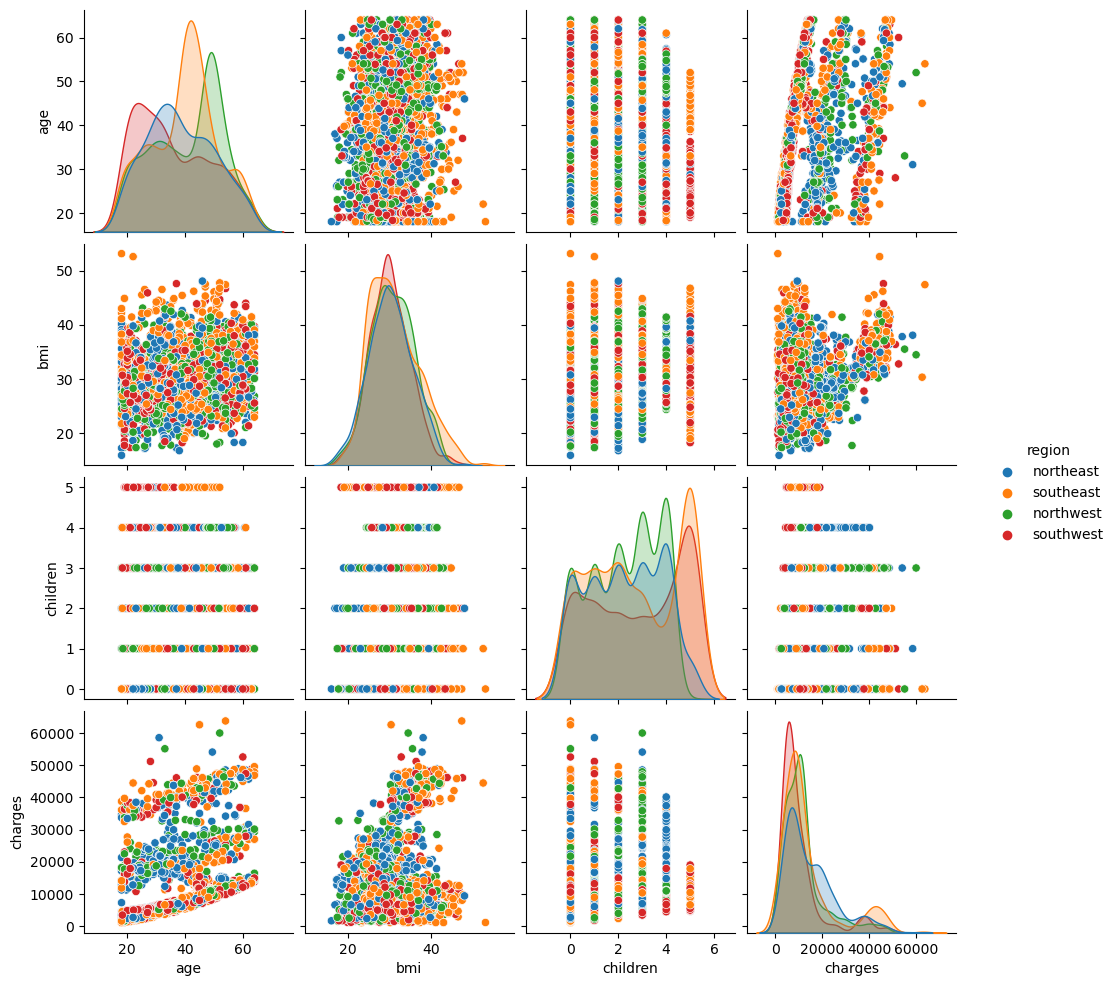

In [8]:
sns.pairplot(data=df, hue='region')

# Sex and region doesnt have much effect on the charges

<AxesSubplot:xlabel='sex', ylabel='count'>

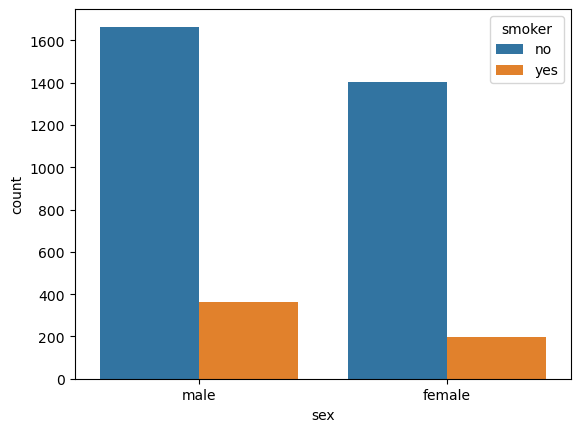

In [9]:
sns.countplot(data=df,x='sex', hue='smoker')

# Males smoke more compared to female

<AxesSubplot:xlabel='age', ylabel='charges'>

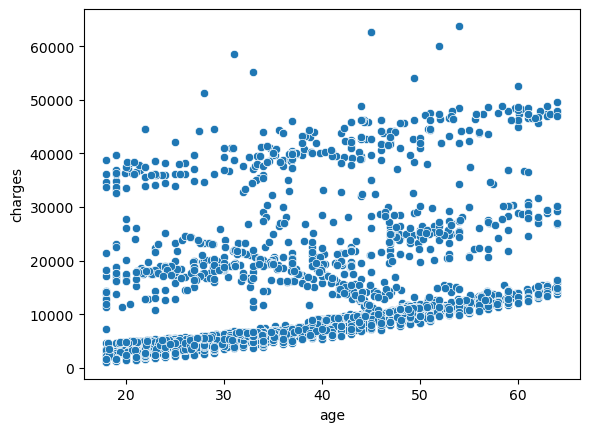

In [10]:
sns.scatterplot(data=df,x='age',y='charges')

# There is a direct relationship between age and charges

<AxesSubplot:xlabel='age', ylabel='charges'>

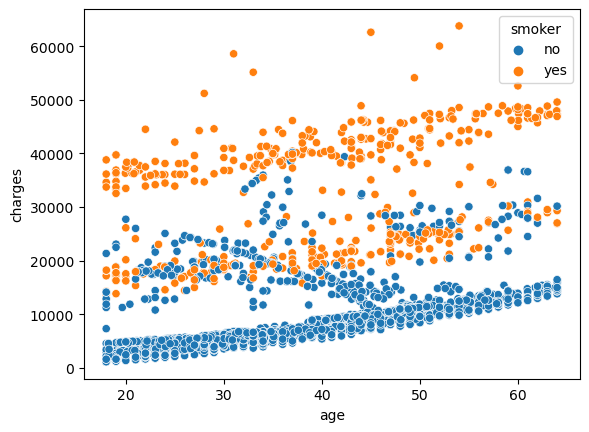

In [11]:
sns.scatterplot(data=df,x='age',y='charges',hue='smoker')

# Age does have an effect on charges but people who smoke pay a lot more than their counterparts who are of same age

<AxesSubplot:xlabel='bmi', ylabel='charges'>

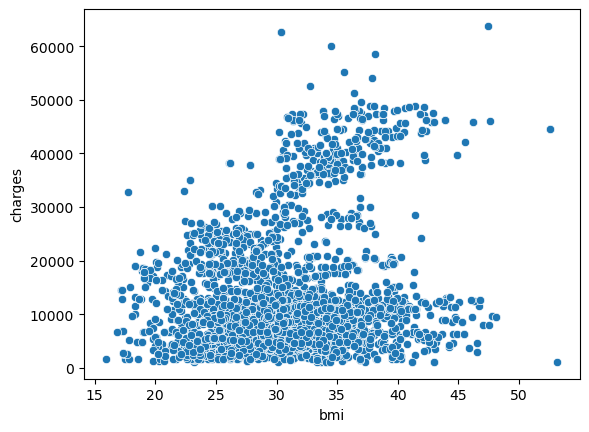

In [12]:
sns.scatterplot(data=df,x='bmi',y='charges')

# A portion of the sample with high BMI pay higer charges

<AxesSubplot:xlabel='bmi', ylabel='charges'>

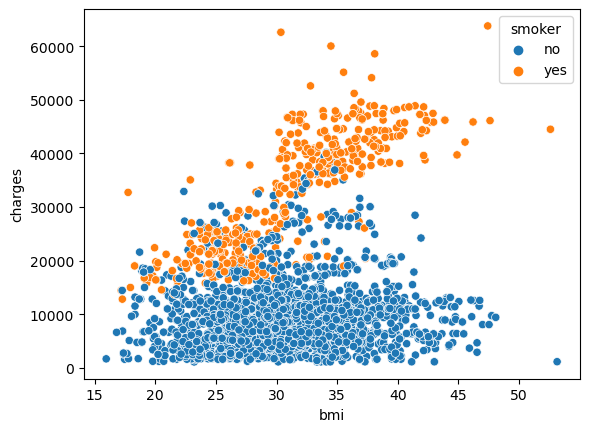

In [13]:
sns.scatterplot(data=df,x='bmi',y='charges',hue='smoker')

# On closer inspection we can see the smoker with high BMI are the ones paying highest charges

# Summary of Analysis:
1. People with high BMI pay higher charges
2. Smokers are charged higher premium compared to non smokers
3. There is a linear relationship between age and premium 

Encoding smoker column with 1 for 'yes' and 0 for 'no'

In [14]:
df['smoker']=list(map(lambda x: 1 if x=='yes' else 0, df['smoker']))

In [15]:
df.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,0,northeast,2,3279.868550
1,36.976978,female,25.744165,1,southeast,3,21454.494239
2,18.000000,male,30.030000,0,southeast,1,1720.353700
3,37.000000,male,30.676891,0,northeast,3,6801.437542
4,58.000000,male,32.010000,0,southeast,1,11946.625900


In [16]:
X=df[['age','bmi','smoker']]
Y=df['charges']

In [17]:
train_X,test_X,train_y,test_y=train_test_split(X,Y, test_size=0.1, random_state=22)

In [18]:
model_lr=LinearRegression()
model_lr.fit(train_X,train_y)


LinearRegression()

In [19]:
lr_pred=model_lr.predict(test_X)

In [20]:
r2_score(test_y,lr_pred)

0.6921863195977654

In [21]:
model_gb=GradientBoostingRegressor()

In [22]:
model_gb.fit(train_X,train_y)

GradientBoostingRegressor()

In [23]:
gb_pred=model_gb.predict(test_X)

In [24]:
r2_score(test_y,gb_pred)

0.8190667319105898

In [25]:
df_test=pd.read_csv('/kaggle/input/medical-insurance-cost/Test_Data.csv')
df_test.head()

,age,sex,bmi,smoker,region,children
0,40.000000,male,29.900000,no,southwest,2
1,47.000000,male,32.300000,no,southwest,1
2,54.000000,female,28.880000,no,northeast,2
3,37.000000,male,30.568094,no,northeast,3
4,59.130049,male,33.132854,yes,northeast,4


In [26]:
df_test['smoker']=list(map(lambda x: 1 if x=='yes' else 0, df_test['smoker']))
test=df_test[['age','bmi','smoker']]


In [27]:
submission=model_gb.predict(test)

In [28]:
submision=pd.DataFrame(submission,columns=['prediction'])
submision.to_csv('/kaggle/working/submission1.csv')
submision

,prediction
0,8667.975871
1,10815.076506
2,12186.842011
3,8993.215262
4,44983.977311
...,...
487,11194.386498
488,6556.481218
489,10858.734454
490,9219.677577
